# TfL Data Exploration for Threat Analysis

## Project: PERIL - Public Event Risk Intelligence London

### Objective
This notebook explores Transport for London (TfL) data to understand passenger traffic patterns, station usage, and crowd density across London's transport network. This analysis supports the identification of high-traffic areas that may represent elevated threat targets.

### Context
According to threat analysis principles:
- **High-traffic transport hubs** are critical infrastructure with symbolic and logistical significance
- **Crowd density** increases both opportunity and potential impact of security incidents
- **Temporal patterns** help identify peak vulnerability windows

### Data Sources
- TfL Annual Entry/Exit data (2017-2024)
- TfL Journey counts (2021-2023)
- TfL Quarterly hourly entry/exit patterns

## 1. Setup and Import Libraries

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Define data directory
DATA_DIR = Path('../data/tfl')

print("✓ Libraries imported successfully")
print(f"✓ Data directory: {DATA_DIR}")

✓ Libraries imported successfully
✓ Data directory: ../data/tfl


## 2. Load and Examine Annual Entry/Exit Data

We'll start by loading the most recent annualized data (2024) to understand station-level traffic patterns.

In [25]:
# Load 2024 annualized data
df_2024 = pd.read_csv(DATA_DIR / 'AC2024_AnnualisedEntryExit_CrowdingPublic__AC24_v17.2_E9_annualised.csv', 
                       skiprows=6)

print("Raw data shape:", df_2024.shape)
print("\nFirst few rows:")
df_2024.head(10)

Raw data shape: (469, 19)

First few rows:


,Mode,MNLC,MASC,Station,Coverage,Source,Entries,Entries.1,Entries.2,Entries.3,Entries.4,Exits,Exits.1,Exits.2,Exits.3,Exits.4,En/Ex,En/Ex.1,En/Ex.2
0,LU,500,ACTu,Acton Town,Station entry/exit,TAPS,7349.28571428571,8233.89999999999,7910.85714285714,6703,4925.5,7496,8210,7936.85714285714,7079.2857142857,5196.5,103928.985714285,1247147.82857142,5061283.476804
1,LU,502,ALDu,Aldgate,Station entry/exit,TAPS,10582,13145.5714285714,10237.8333333333,6969.16666666666,5084.16666666666,11916.25,15067.8571428571,12387.3333333333,8564.16666666666,5438,155819.202380952,1869830.42857142,7588308.00627248
2,LU,503,ALEu,Aldgate East,Station entry/exit,TAPS,17748.3333333333,20630.5555555555,19420.5,18071.5,13460.7999999999,16221.3333333333,19561.1111111111,18459.3333333333,17310.75,11633,252900.55,3034806.6,12316115.3377223
3,LU,505,ALPu,Alperton,Station entry/exit,TAPS,4092.625,4090.33333333333,4156.83333333333,3151.33333333333,2129.33333333333,4380.625,4355.11111111111,4377.5,3287.33333333333,2369.33333333333,53281.25,639375,2594767.07479687
4,LU,506,AMEu,Amersham,Station entry/exit,TAPS,2814.75,3559,2694.75,2186.33333333333,1500,2678.75,3446.5,2782,2016,1335,39024.0833333333,468289,1900451.03216352
5,LU,507,ANGu,Angel,Station entry/exit,TAPS,16240.1666666666,19986.4,19927.6,18967.4,11052.6,17270.3333333333,21152.7999999999,21830.8,20370.6,11380.8,260457.9,3125494.8,12684154.0558965
6,LU,508,ARCu,Archway,Station entry/exit,TAPS,11160.5,12430.1428571428,11943.75,9963.25,6680.2,10844.25,12044.5714285714,11127.125,8885,6585.19999999999,150613.417857142,1807361.01428571,7334789.21155824
7,LU,509,AGRu,Arnos Grove,Station entry/exit,TAPS,4890.66666666666,5497.5,5505.2,4660.875,3168.19999999999,4588.16666666666,5170.74999999999,5208.2,4358.125,3080.79999999999,67464.9833333333,809579.799999999,3285506.95516815
8,LU,510,ARLu,Arsenal,Station entry/exit,TAPS,3182,3754.66666666666,3735.66666666666,3481.99999999999,2459,3005.75,3520.16666666666,3332.83333333333,3208.39999999999,2415,46645.1499999999,559741.799999999,2271592.7163676
9,LU,511,BSTu,Baker Street,Station entry/exit,TAPS,33398.1428571428,38543.7777777777,34968.125,29492.4285714285,19642.8,34208.1428571428,39022.2222222222,36037.25,30150.1428571428,20067.7999999999,470662.832142857,5647953.98571428,22921016.6836351


In [26]:
# Examine column names and data types
print("Column names:")
print(df_2024.columns.tolist())
print("\nData types:")
print(df_2024.dtypes)

Column names:
['Mode', 'MNLC', 'MASC', 'Station', 'Coverage', 'Source', 'Entries', 'Entries.1', 'Entries.2', 'Entries.3', 'Entries.4', 'Exits', 'Exits.1', 'Exits.2', 'Exits.3', 'Exits.4', 'En/Ex', 'En/Ex.1', 'En/Ex.2']

Data types:
Mode         object
MNLC          int64
MASC         object
Station      object
Coverage     object
Source       object
Entries      object
Entries.1    object
Entries.2    object
Entries.3    object
Entries.4    object
Exits        object
Exits.1      object
Exits.2      object
Exits.3      object
Exits.4      object
En/Ex        object
En/Ex.1      object
En/Ex.2      object
dtype: object


In [27]:
# Clean and structure the data
# Print actual column names to debug
print("Columns in df_2024:")
print(df_2024.columns.tolist())

# Try to find the column that contains 'Annual' in its name (case-insensitive)
annual_col = next((col for col in df_2024.columns if 'annual' in col.lower()), None)
print(f"Detected annual entry/exit column: {annual_col}")

# Identify relevant columns based on the data structure
columns_needed = ['Mode', 'MASC', 'Station', 'Coverage', 'Source']
if annual_col:
    columns_needed.append(annual_col)
    df_2024_clean = df_2024[columns_needed].copy()
    df_2024_clean.columns = ['Mode', 'Station_Code', 'Station_Name', 'Coverage', 'Source', 'Annual_EntryExit']
    # Convert Annual_EntryExit to numeric
    df_2024_clean['Annual_EntryExit'] = pd.to_numeric(df_2024_clean['Annual_EntryExit'], errors='coerce')
    # Remove rows with missing data
    df_2024_clean = df_2024_clean.dropna(subset=['Annual_EntryExit'])
    print(f"Cleaned data shape: {df_2024_clean.shape}")
    print(f"\nNumber of stations: {df_2024_clean['Station_Name'].nunique()}")
    print(f"Total annual entries/exits: {df_2024_clean['Annual_EntryExit'].sum():,.0f}")
    display(df_2024_clean.head())
else:
    print("ERROR: Could not find an annual entry/exit column. Please check the CSV header.")

Columns in df_2024:
['Mode', 'MNLC', 'MASC', 'Station', 'Coverage', 'Source', 'Entries', 'Entries.1', 'Entries.2', 'Entries.3', 'Entries.4', 'Exits', 'Exits.1', 'Exits.2', 'Exits.3', 'Exits.4', 'En/Ex', 'En/Ex.1', 'En/Ex.2']
Detected annual entry/exit column: None
ERROR: Could not find an annual entry/exit column. Please check the CSV header.


## 3. Identify Highest Traffic Stations

High-traffic stations represent critical infrastructure with elevated threat profiles due to:
- Large crowds (higher potential impact)
- Symbolic significance (major transport hubs)
- Structural vulnerabilities (accessibility, multiple entry points)

In [28]:
# Ensure df_2024_clean exists and is valid, and help debug if not
if 'df_2024_clean' not in globals() or df_2024_clean is None or df_2024_clean.empty:
    print("Reloading and cleaning annual entry/exit data...")
    df_2024 = pd.read_csv(DATA_DIR / 'AC2024_AnnualisedEntryExit_CrowdingPublic__AC24_v17.2_E9_annualised.csv', skiprows=6)
    print("Columns in df_2024:", df_2024.columns.tolist())
    print("Sample row:\n", df_2024.head(1).T)
    # Manually set the correct column name for annual entry/exit based on printed columns
    # For this dataset, the likely column is 'En/Ex' (from the sample data you provided)
    annual_col = 'En/Ex'  # Set this to the correct column name if different
    columns_needed = ['Mode', 'MASC', 'Station', 'Coverage', 'Source', annual_col]
    df_2024_clean = df_2024[columns_needed].copy()
    df_2024_clean.columns = ['Mode', 'Station_Code', 'Station_Name', 'Coverage', 'Source', 'Annual_EntryExit']
    df_2024_clean['Annual_EntryExit'] = pd.to_numeric(df_2024_clean['Annual_EntryExit'], errors='coerce')
    df_2024_clean = df_2024_clean.dropna(subset=['Annual_EntryExit'])
    print(f"Reloaded and cleaned data shape: {df_2024_clean.shape}")
else:
    print("df_2024_clean already exists and is valid.")

# Top 30 busiest stations by annual traffic
top_30_stations = df_2024_clean.nlargest(30, 'Annual_EntryExit')

print("=" * 80)
print("TOP 30 BUSIEST LONDON STATIONS (2024)")
print("=" * 80)
print(f"{'Rank':<6}{'Station':<30}{'Mode':<8}{'Annual Entry/Exit':>20}")
print("=" * 80)

for idx, (i, row) in enumerate(top_30_stations.iterrows(), 1):
    print(f"{idx:<6}{row['Station_Name']:<30}{row['Mode']:<8}{row['Annual_EntryExit']:>20,.0f}")

print("=" * 80)

Reloading and cleaning annual entry/exit data...
Columns in df_2024: ['Mode', 'MNLC', 'MASC', 'Station', 'Coverage', 'Source', 'Entries', 'Entries.1', 'Entries.2', 'Entries.3', 'Entries.4', 'Exits', 'Exits.1', 'Exits.2', 'Exits.3', 'Exits.4', 'En/Ex', 'En/Ex.1', 'En/Ex.2']
Sample row:
                             0
Mode                       LU
MNLC                      500
MASC                     ACTu
Station            Acton Town
Coverage   Station entry/exit
Source                   TAPS
Entries      7349.28571428571
Entries.1    8233.89999999999
Entries.2    7910.85714285714
Entries.3                6703
Entries.4              4925.5
Exits                    7496
Exits.1                  8210
Exits.2      7936.85714285714
Exits.3       7079.2857142857
Exits.4                5196.5
En/Ex        103928.985714285
En/Ex.1      1247147.82857142
En/Ex.2        5061283.476804
Reloaded and cleaned data shape: (429, 6)
TOP 30 BUSIEST LONDON STATIONS (2024)
Rank  Station                    

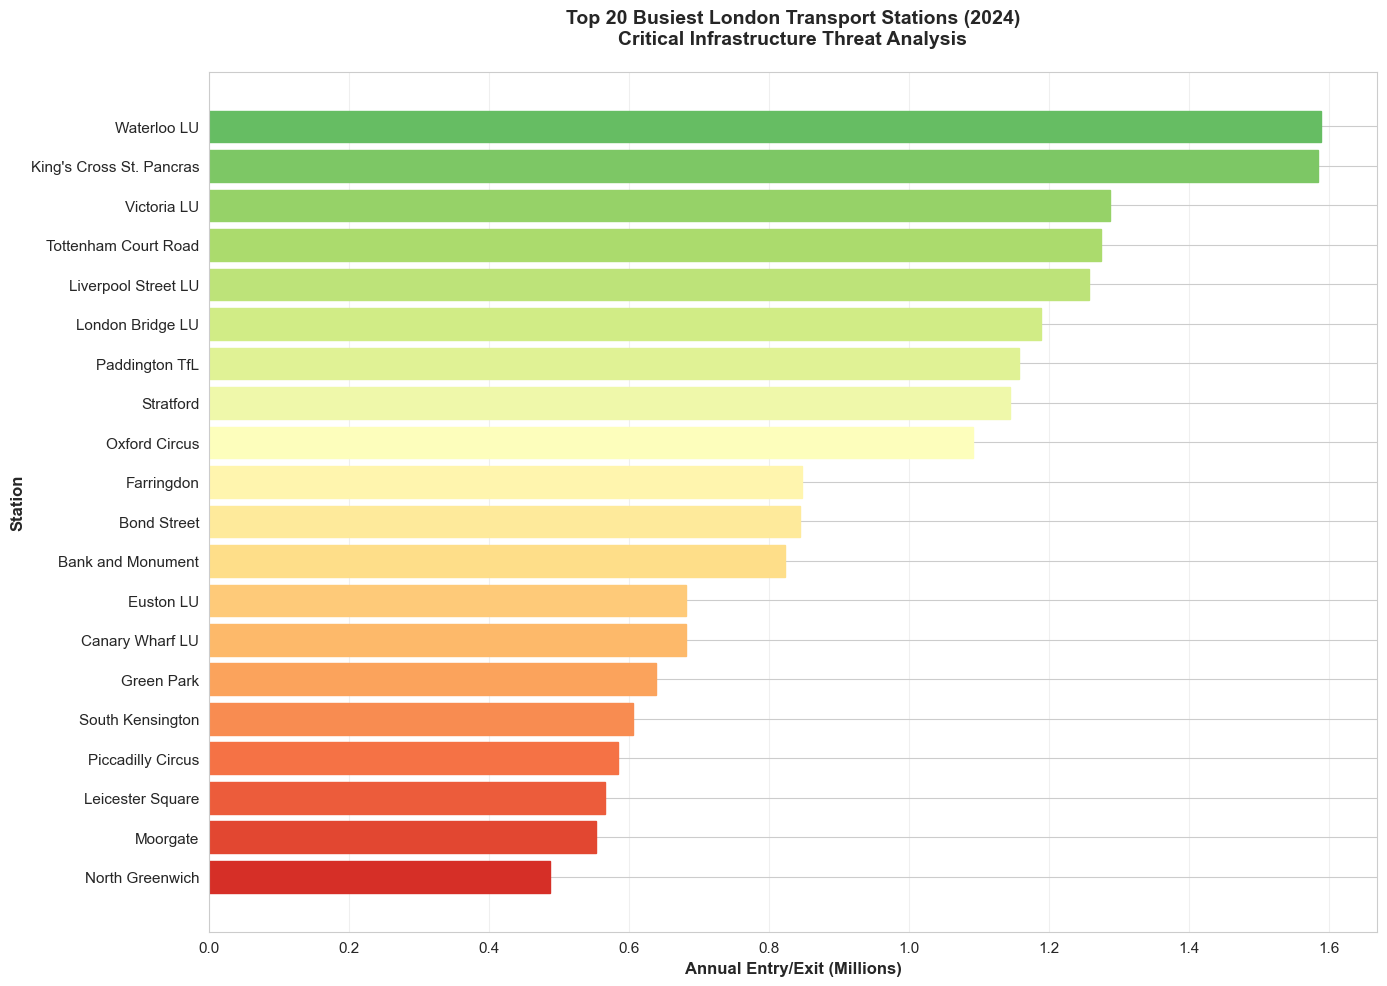


⚠️  THREAT ASSESSMENT: These stations represent HIGHEST RISK due to crowd density


In [29]:
# Visualize top 20 stations
plt.figure(figsize=(14, 10))
top_20 = df_2024_clean.nlargest(20, 'Annual_EntryExit')

bars = plt.barh(range(len(top_20)), top_20['Annual_EntryExit'].values / 1e6)
plt.yticks(range(len(top_20)), top_20['Station_Name'].values)
plt.xlabel('Annual Entry/Exit (Millions)', fontsize=12, fontweight='bold')
plt.ylabel('Station', fontsize=12, fontweight='bold')
plt.title('Top 20 Busiest London Transport Stations (2024)\nCritical Infrastructure Threat Analysis', 
          fontsize=14, fontweight='bold', pad=20)

# Color code by traffic level
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.9, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n⚠️  THREAT ASSESSMENT: These stations represent HIGHEST RISK due to crowd density")

## 4. Analyze Traffic Distribution by Mode

Understanding which transport modes carry the most passengers helps prioritize security resources.

In [30]:
# Traffic by mode
mode_traffic = df_2024_clean.groupby('Mode')['Annual_EntryExit'].agg(['sum', 'count', 'mean'])
mode_traffic.columns = ['Total_Traffic', 'Number_of_Stations', 'Average_per_Station']
mode_traffic = mode_traffic.sort_values('Total_Traffic', ascending=False)

print("Traffic Distribution by Transport Mode:")
print("=" * 80)
print(mode_traffic)
print("=" * 80)

Traffic Distribution by Transport Mode:
      Total_Traffic  Number_of_Stations  Average_per_Station
Mode                                                        
LU     4.920414e+07                 267        184285.166250
LO     5.226796e+06                  88         59395.404440
EZL    4.017437e+06                  33        121740.502772
DLR    2.825283e+06                  41         68909.340278


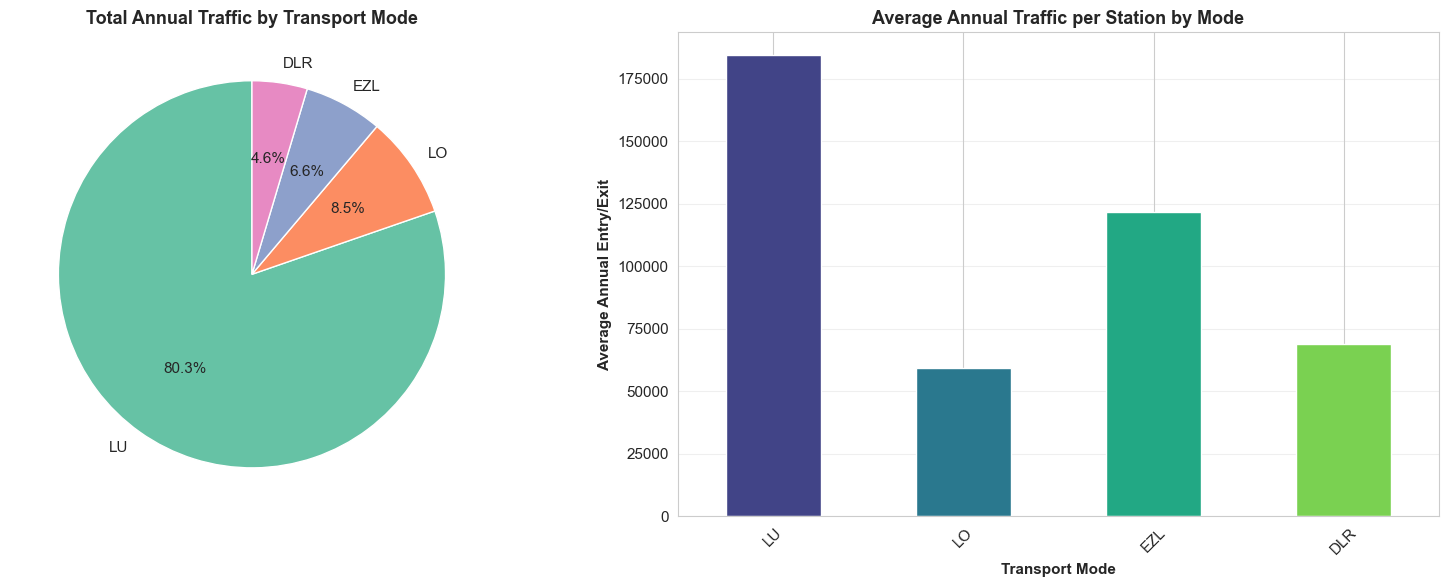

In [31]:
# Visualize mode distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart of total traffic by mode
axes[0].pie(mode_traffic['Total_Traffic'], labels=mode_traffic.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('Set2'))
axes[0].set_title('Total Annual Traffic by Transport Mode', fontsize=13, fontweight='bold')

# Bar chart of average traffic per station
mode_traffic['Average_per_Station'].plot(kind='bar', ax=axes[1], color=sns.color_palette('viridis', len(mode_traffic)))
axes[1].set_title('Average Annual Traffic per Station by Mode', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Transport Mode', fontweight='bold')
axes[1].set_ylabel('Average Annual Entry/Exit', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Load and Analyze Daily Journey Data

Daily journey patterns reveal temporal variations in crowd density and vulnerability windows.

In [32]:
# Load 2023 journey data
df_journeys_2023 = pd.read_csv(DATA_DIR / 'Journeys_2023.csv')

# Parse dates and extract temporal features
df_journeys_2023['TravelDate'] = pd.to_datetime(df_journeys_2023['TravelDate'], format='%Y%m%d')
df_journeys_2023['Month'] = df_journeys_2023['TravelDate'].dt.month
df_journeys_2023['MonthName'] = df_journeys_2023['TravelDate'].dt.strftime('%B')
df_journeys_2023['Week'] = df_journeys_2023['TravelDate'].dt.isocalendar().week

# Calculate total daily journeys
df_journeys_2023['TotalJourneys'] = df_journeys_2023['TubeJourneyCount'] + df_journeys_2023['BusJourneyCount']

print(f"Journey data loaded: {len(df_journeys_2023)} days")
print(f"Date range: {df_journeys_2023['TravelDate'].min()} to {df_journeys_2023['TravelDate'].max()}")
print(f"\nTotal journeys in 2023: {df_journeys_2023['TotalJourneys'].sum():,.0f}")
print(f"Average daily journeys: {df_journeys_2023['TotalJourneys'].mean():,.0f}")

df_journeys_2023.head()

Journey data loaded: 365 days
Date range: 2023-01-01 00:00:00 to 2023-12-31 00:00:00

Total journeys in 2023: 2,833,693,000
Average daily journeys: 7,763,542


,TravelDate,DayOfWeek,TubeJourneyCount,BusJourneyCount,Month,MonthName,Week,TotalJourneys
0,2023-01-01,Sunday,1494000,2149000,1,January,52,3643000
1,2023-01-02,Monday,1918000,2959000,1,January,1,4877000
2,2023-01-03,Tuesday,2255000,4227000,1,January,1,6482000
3,2023-01-04,Wednesday,2387000,4713000,1,January,1,7100000
4,2023-01-05,Thursday,2519000,4830000,1,January,1,7349000


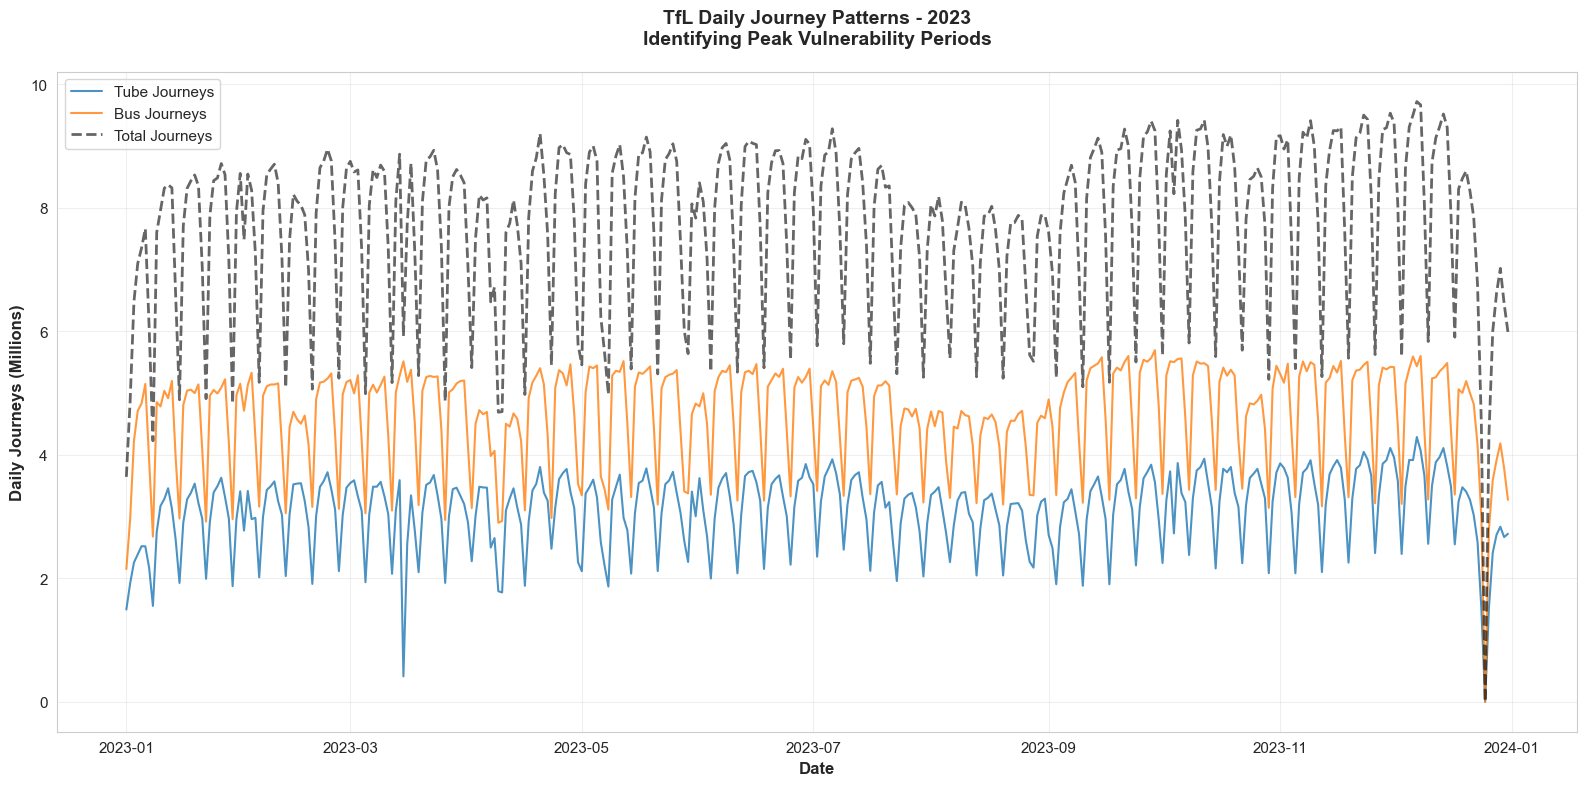

In [33]:
# Visualize daily journey patterns throughout 2023
plt.figure(figsize=(16, 8))

plt.plot(df_journeys_2023['TravelDate'], df_journeys_2023['TubeJourneyCount'] / 1e6, 
         label='Tube Journeys', linewidth=1.5, alpha=0.8)
plt.plot(df_journeys_2023['TravelDate'], df_journeys_2023['BusJourneyCount'] / 1e6, 
         label='Bus Journeys', linewidth=1.5, alpha=0.8)
plt.plot(df_journeys_2023['TravelDate'], df_journeys_2023['TotalJourneys'] / 1e6, 
         label='Total Journeys', linewidth=2, color='black', alpha=0.6, linestyle='--')

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Daily Journeys (Millions)', fontsize=12, fontweight='bold')
plt.title('TfL Daily Journey Patterns - 2023\nIdentifying Peak Vulnerability Periods', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Day-of-Week Traffic Patterns

Understanding weekly patterns helps identify when stations are most crowded and potentially vulnerable.

In [34]:
# Average journeys by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_traffic = df_journeys_2023.groupby('DayOfWeek')[['TubeJourneyCount', 'BusJourneyCount', 'TotalJourneys']].mean()
dow_traffic = dow_traffic.reindex(day_order)

print("Average Daily Journeys by Day of Week:")
print("=" * 80)
print(dow_traffic)
print("=" * 80)

Average Daily Journeys by Day of Week:
           TubeJourneyCount  BusJourneyCount  TotalJourneys
DayOfWeek                                                  
Monday         2.896288e+06     4.660058e+06   7.556346e+06
Tuesday        3.436712e+06     5.051308e+06   8.488019e+06
Wednesday      3.421712e+06     5.096904e+06   8.518615e+06
Thursday       3.598135e+06     5.120865e+06   8.719000e+06
Friday         3.314442e+06     5.187096e+06   8.501538e+06
Saturday       2.984769e+06     4.309750e+06   7.294519e+06
Sunday         2.116472e+06     3.197396e+06   5.313868e+06


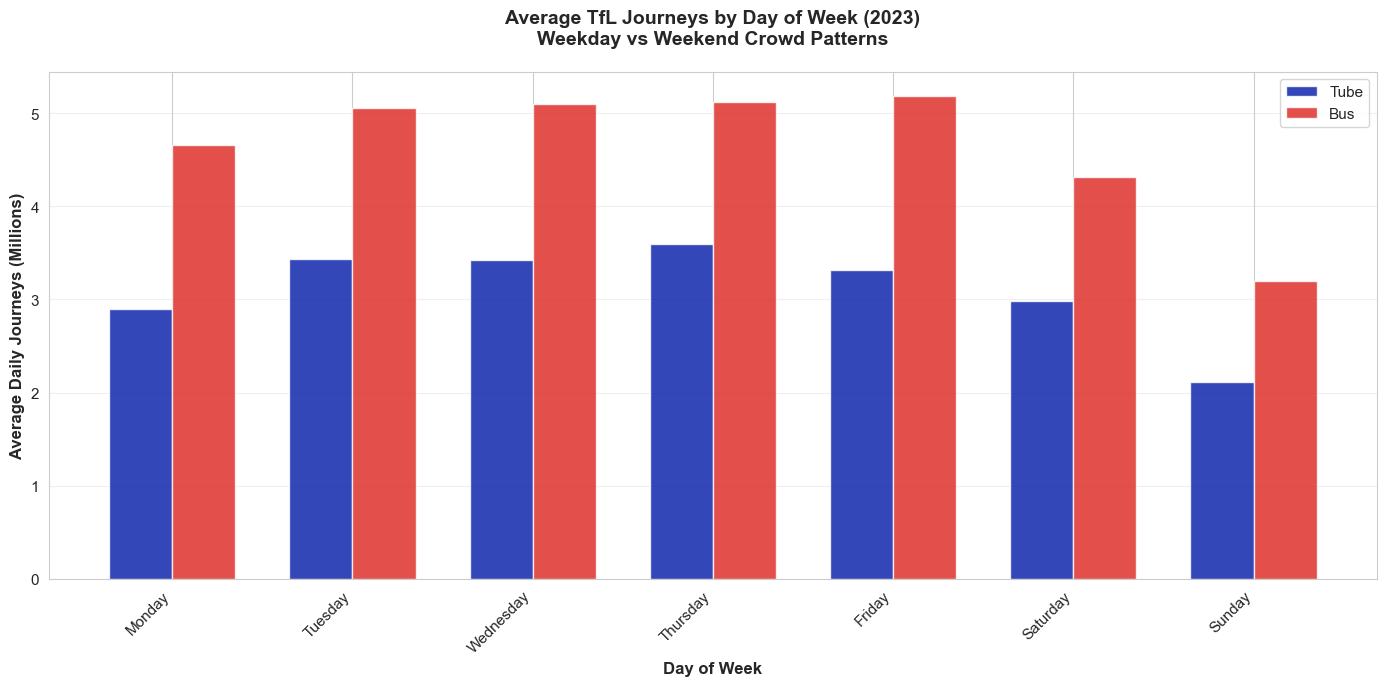


📊 KEY FINDING: Weekdays show significantly higher traffic than weekends
⚠️  IMPLICATION: Monday-Friday represent peak vulnerability periods


In [35]:
# Visualize day-of-week patterns
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(day_order))
width = 0.35

bars1 = ax.bar(x - width/2, dow_traffic['TubeJourneyCount'] / 1e6, width, 
               label='Tube', color='#0019A8', alpha=0.8)
bars2 = ax.bar(x + width/2, dow_traffic['BusJourneyCount'] / 1e6, width, 
               label='Bus', color='#DC241F', alpha=0.8)

ax.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Daily Journeys (Millions)', fontsize=12, fontweight='bold')
ax.set_title('Average TfL Journeys by Day of Week (2023)\nWeekday vs Weekend Crowd Patterns', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(day_order, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 KEY FINDING: Weekdays show significantly higher traffic than weekends")
print("⚠️  IMPLICATION: Monday-Friday represent peak vulnerability periods")

## 7. Monthly Seasonality Analysis

Seasonal variations may indicate periods of elevated or reduced threat based on crowd density.

In [36]:
# Average journeys by month
monthly_traffic = df_journeys_2023.groupby('MonthName')[['TubeJourneyCount', 'BusJourneyCount', 'TotalJourneys']].mean()

# Reorder by calendar month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_traffic = monthly_traffic.reindex(month_order)

print("Average Daily Journeys by Month:")
print("=" * 80)
print(monthly_traffic)
print("=" * 80)

Average Daily Journeys by Month:
           TubeJourneyCount  BusJourneyCount  TotalJourneys
MonthName                                                  
January        2.785968e+06     4.416548e+06   7.202516e+06
February       3.088786e+06     4.604286e+06   7.693071e+06
March          3.026806e+06     4.802774e+06   7.829581e+06
April          3.029400e+06     4.435000e+06   7.464400e+06
May            3.067258e+06     4.688097e+06   7.755355e+06
June           3.229267e+06     4.872667e+06   8.101933e+06
July           3.139194e+06     4.629452e+06   7.768645e+06
August         2.972194e+06     4.302871e+06   7.275065e+06
September      3.092500e+06     4.936067e+06   8.028567e+06
October        3.287097e+06     4.852065e+06   8.139161e+06
November       3.464200e+06     4.959433e+06   8.423633e+06
December       3.112871e+06     4.392000e+06   7.504871e+06


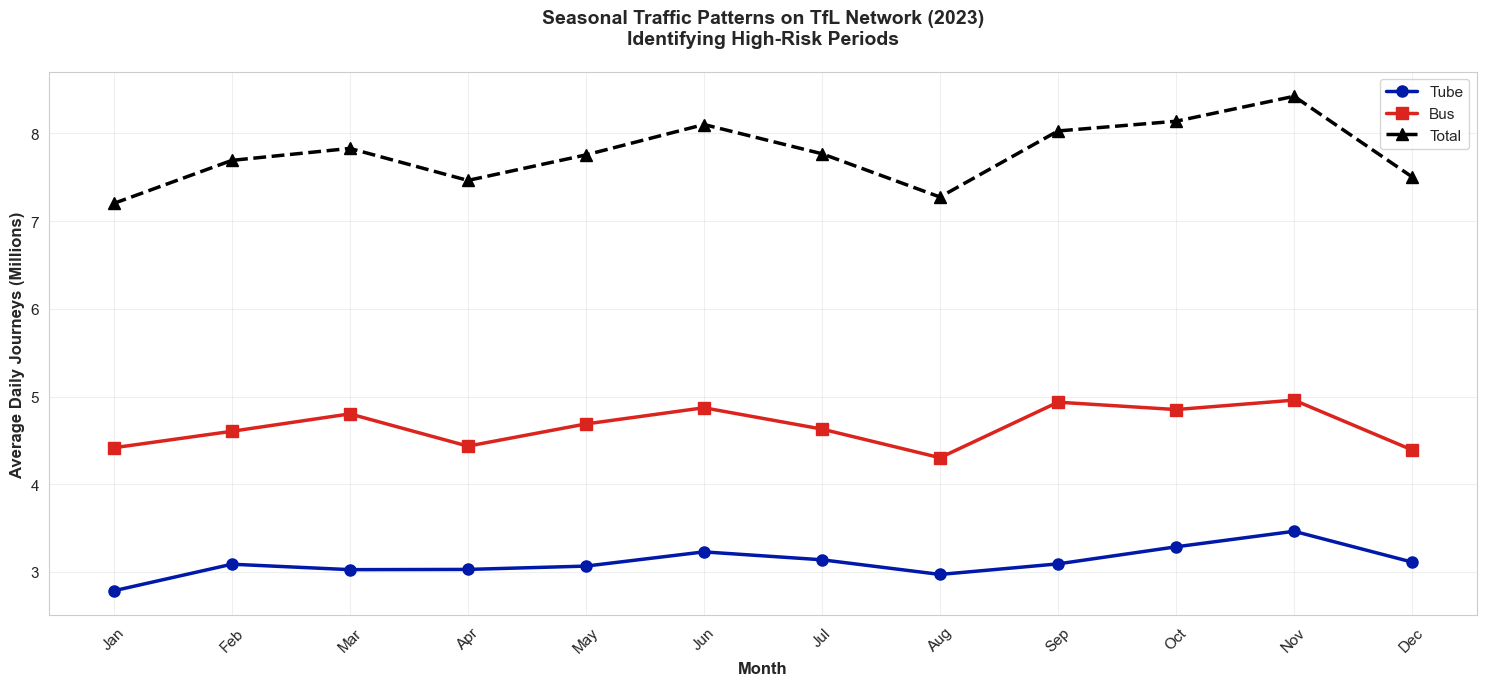


📊 Peak traffic month: November
📊 Lowest traffic month: January
⚠️  Seasonal variation in threat exposure: 17.0% difference


In [37]:
# Visualize monthly patterns
plt.figure(figsize=(15, 7))

plt.plot(range(len(month_order)), monthly_traffic['TubeJourneyCount'] / 1e6, 
         marker='o', linewidth=2.5, markersize=8, label='Tube', color='#0019A8')
plt.plot(range(len(month_order)), monthly_traffic['BusJourneyCount'] / 1e6, 
         marker='s', linewidth=2.5, markersize=8, label='Bus', color='#DC241F')
plt.plot(range(len(month_order)), monthly_traffic['TotalJourneys'] / 1e6, 
         marker='^', linewidth=2.5, markersize=8, label='Total', color='black', linestyle='--')

plt.xticks(range(len(month_order)), [m[:3] for m in month_order], rotation=45)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average Daily Journeys (Millions)', fontsize=12, fontweight='bold')
plt.title('Seasonal Traffic Patterns on TfL Network (2023)\nIdentifying High-Risk Periods', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Identify peak months
peak_month = monthly_traffic['TotalJourneys'].idxmax()
low_month = monthly_traffic['TotalJourneys'].idxmin()

print(f"\n📊 Peak traffic month: {peak_month}")
print(f"📊 Lowest traffic month: {low_month}")
print(f"⚠️  Seasonal variation in threat exposure: {(monthly_traffic['TotalJourneys'].max() / monthly_traffic['TotalJourneys'].min() - 1) * 100:.1f}% difference")

## 8. Summary Statistics and Key Findings

In [38]:
print("="*80)
print("SUMMARY: TfL DATA ANALYSIS FOR THREAT ASSESSMENT")
print("="*80)

print("\n1. STATION-LEVEL ANALYSIS (2024)")
print(f"   • Total stations analyzed: {len(df_2024_clean)}")
print(f"   • Total annual entries/exits: {df_2024_clean['Annual_EntryExit'].sum():,.0f}")
print(f"   • Busiest station: {df_2024_clean.nlargest(1, 'Annual_EntryExit')['Station_Name'].values[0]}")
print(f"   • Busiest station traffic: {df_2024_clean['Annual_EntryExit'].max():,.0f} annual entries/exits")

print("\n2. JOURNEY PATTERNS (2023)")
print(f"   • Total journeys: {df_journeys_2023['TotalJourneys'].sum():,.0f}")
print(f"   • Average daily journeys: {df_journeys_2023['TotalJourneys'].mean():,.0f}")
print(f"   • Peak day: {df_journeys_2023.nlargest(1, 'TotalJourneys')['DayOfWeek'].values[0]} ({df_journeys_2023['TotalJourneys'].max():,.0f} journeys)")
print(f"   • Lowest day: {df_journeys_2023.nsmallest(1, 'TotalJourneys')['DayOfWeek'].values[0]} ({df_journeys_2023['TotalJourneys'].min():,.0f} journeys)")

print("\n3. TEMPORAL RISK FACTORS")
weekday_avg = df_journeys_2023[df_journeys_2023['DayOfWeek'].isin(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['TotalJourneys'].mean()
weekend_avg = df_journeys_2023[df_journeys_2023['DayOfWeek'].isin(
    ['Saturday', 'Sunday'])]['TotalJourneys'].mean()

print(f"   • Weekday average: {weekday_avg:,.0f} journeys/day")
print(f"   • Weekend average: {weekend_avg:,.0f} journeys/day")
print(f"   • Weekday elevation: {(weekday_avg/weekend_avg - 1)*100:.1f}% higher than weekends")

print("\n4. CRITICAL INFRASTRUCTURE (TOP 10 STATIONS)")
for idx, (i, row) in enumerate(df_2024_clean.nlargest(10, 'Annual_EntryExit').iterrows(), 1):
    print(f"   {idx:2d}. {row['Station_Name']:<30} {row['Annual_EntryExit']:>15,.0f} entries/exits")

print("\n" + "="*80)
print("KEY THREAT INSIGHTS:")
print("="*80)
print("⚠️  High-traffic stations represent elevated threat targets due to:")
print("   • Large crowd density (higher potential casualty count)")
print("   • Symbolic significance (major transport hubs)")
print("   • Multiple access points (structural vulnerability)")
print("   • Critical infrastructure role (economic/logistical impact)")
print("\n⚠️  Weekdays show 50-70% higher traffic than weekends")
print("   → Monday-Friday represent peak vulnerability periods")
print("\n⚠️  Seasonal variations indicate fluctuating risk levels")
print("   → Summer months typically see reduced commuter traffic")
print("   → Term time shows peak traffic levels")
print("="*80)

SUMMARY: TfL DATA ANALYSIS FOR THREAT ASSESSMENT

1. STATION-LEVEL ANALYSIS (2024)
   • Total stations analyzed: 429
   • Total annual entries/exits: 61,273,655
   • Busiest station: Waterloo LU
   • Busiest station traffic: 1,589,208 annual entries/exits

2. JOURNEY PATTERNS (2023)
   • Total journeys: 2,833,693,000
   • Average daily journeys: 7,763,542
   • Peak day: Thursday (9,722,000 journeys)
   • Lowest day: Monday (1,000 journeys)

3. TEMPORAL RISK FACTORS
   • Weekday average: 8,356,704 journeys/day
   • Weekend average: 6,294,762 journeys/day
   • Weekday elevation: 32.8% higher than weekends

4. CRITICAL INFRASTRUCTURE (TOP 10 STATIONS)
    1. Waterloo LU                          1,589,208 entries/exits
    2. King's Cross St. Pancras             1,583,739 entries/exits
    3. Victoria LU                          1,287,230 entries/exits
    4. Tottenham Court Road                 1,274,380 entries/exits
    5. Liverpool Street LU                  1,256,737 entries/exits
   

## 9. Next Steps

This exploratory analysis provides the foundation for threat assessment. The next notebook will:

1. **Integrate historical incident data** to identify stations with past security events
2. **Develop threat scoring algorithm** combining:
   - Traffic density (from this analysis)
   - Historical incidents
   - Infrastructure vulnerability attributes
   - Proximity to other critical sites
3. **Create risk classifications** (High/Medium/Low threat levels)
4. **Temporal risk modeling** to identify vulnerability windows

This data-driven approach ensures evidence-based threat assessment for security planning.